1. the number of claims received by an insurance company during a week follows a Poisson distribution with unknown mean (µ). The number of claims, per week, observed over a ten week period are:
5, 8, 4, 6, 11, 6, 6, 5, 6, 4

 suppose to use a prior uniform distribution for µ
- find the posterior distribution for µ and compute the posterior mean, median and variance
- plot the posterior distribution and the 95% credibility interval

In [1]:
#The posterior will become gamma distribution because of the uniform prior 
data <- c(5,8,4,6,11,6,6,5,6,4)
lambda <- length(data)
alpha_1 <- sum(data)+1 #for gamma derives from uniform prior, alpha = sum(data)+1 

The mean is : 6.2 
The variance is : 0.62 
The median is : 6.17 
The credibility bound is between  4.75  to  7.84 
Recheck with integration between lower and upper bound gives 0.95 area

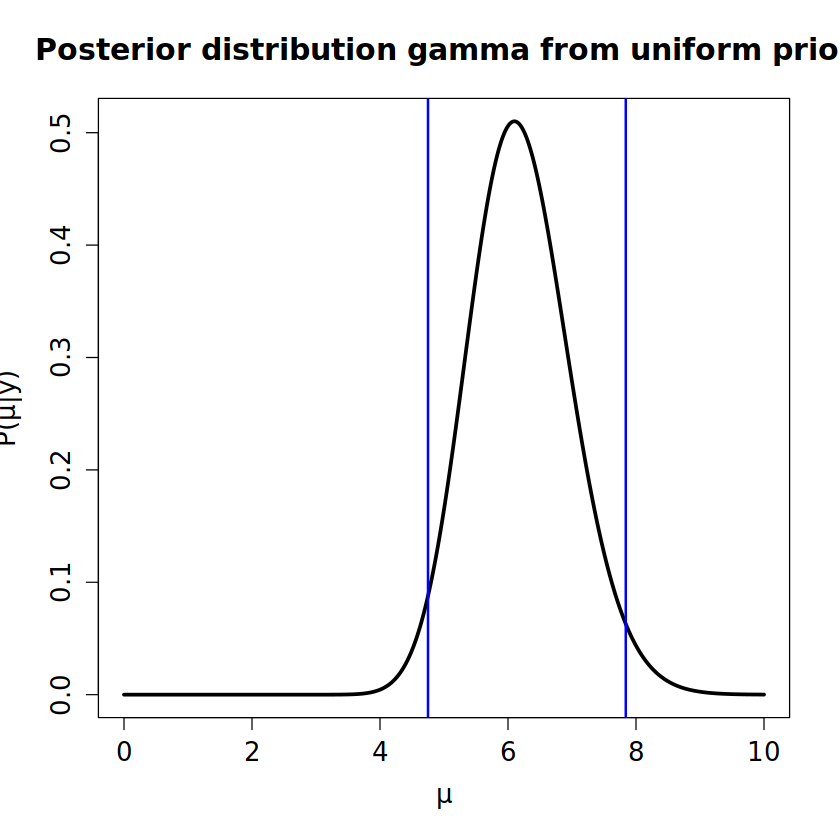

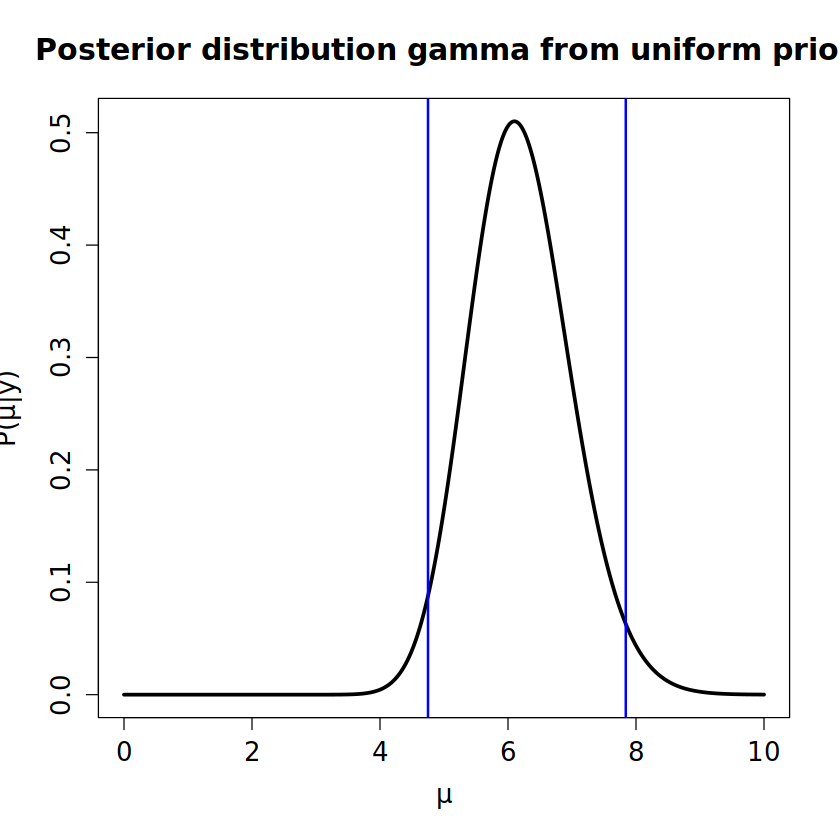

In [2]:
#count the posterior distribution
delta <- 0.001 
mu <- seq(0,10,delta)
post_unif <- function(mu) dgamma(mu,alpha_1,lambda)
norm_const<- integrate(post_unif,0,10)$value
post_unif_norm <- function(mu) post_unif(mu)/norm_const


#count mean, variance, median
mean_unif <- alpha_1/lambda
variance_unif <- alpha_1/(lambda^2)
#median is when it is 50% of the data, so finding the root when the value is 50%
median <- round(uniroot(function(x)integrate(post_unif_norm,0,x)$value-0.5,c(0,10))$root,2)
cat("The mean is :", mean_unif, "\n")
cat("The variance is :", variance_unif,"\n")
cat("The median is :", median,"\n")         
                        
#count 95% credibility
credibility_bound <- function(x, posterior_function) {
     lower_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.025,c(0,10))$root,2)
     upper_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.975,c(0,10))$root,2) 
     newarea <- round(integrate(posterior_function,lower_bound,upper_bound)$value,2)                             
     return(c(LB = lower_bound, UB = upper_bound, Area = newarea))}

lower_bound_unif <-  credibility_bound(mu, post_unif_norm)["LB"]
upper_bound_unif <-  credibility_bound(mu, post_unif_norm)["UB"]
newarea <-  credibility_bound(mu, post_unif_norm)["Area"]

cat("The credibility bound is between ", lower_bound_unif, " to ",upper_bound_unif,"\n")         
cat("Recheck with integration between lower and upper bound gives",newarea,"area")    
                        
                    
#plotting                        
plot(mu,post_unif_norm(mu),main="Posterior distribution gamma from uniform prior",xlab=expression(paste(mu)),
    ylab=expression(paste("P(",mu,"|y)")), cex.lab=1.3,cex.axis=1.3,cex.main=1.5,type='l',lwd=3)
abline(v=lower_bound_unif,col = "blue",lty=1, lwd = 2)
abline(v=upper_bound_unif,col = "blue",lty=1, lwd = 2)

b) suppose to use a Jeffreys’ prior for µ (g(µ) ∝ 1/sqrtµ)
- find the posterior distribution for µ and compute the posterior mean, median and variance
- plot the posterior distribution and the 95% credibility interval


In [3]:
#for gamma derives from uniform prior, alpha = sum(data)+0.5 
#lambda is still the same with the previous one
alpha_2 <- sum(data)+0.5

The mean is : 6.15 
The variance is : 0.615 
The median is : 6.12 
The credibility bound is between  4.75  to  7.84 
Recheck with integration between lower and upper bound gives 0.95 area

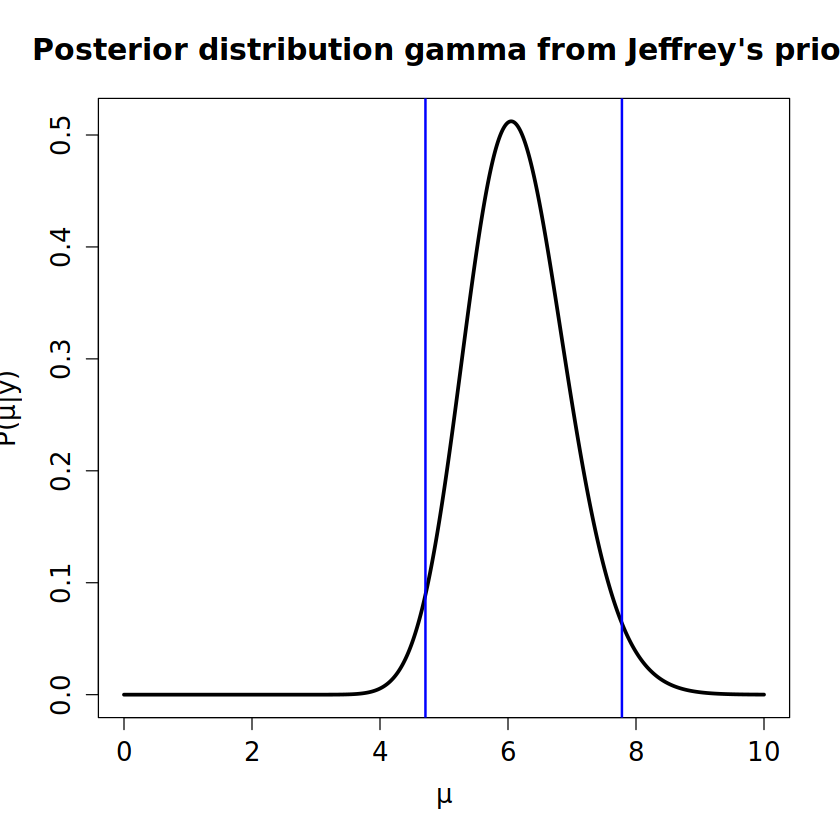

In [4]:
#count the posterior distribution
delta <- 0.001 
mu <- seq(0,10,delta)
post_jeff <- function(mu) dgamma(mu,alpha_2,lambda)
norm_const<- integrate(post_jeff,0,10)$value
post_jeff_norm <- function(mu) post_jeff(mu)/norm_const


#count mean, variance, median
mean_jeff <- alpha_2/lambda
variance_jeff <- alpha_2/(lambda^2)
#median is when it is 50% of the data, so finding the root when the value is 50%
median <- round(uniroot(function(x)integrate(post_jeff_norm,0,x)$value-0.5,c(0,10))$root,2)
cat("The mean is :", mean_jeff, "\n")
cat("The variance is :", variance_jeff,"\n")
cat("The median is :", median,"\n")         
                        
#count 95% credibility using the credibility function defined previously 
lower_bound_jeff <-  credibility_bound(mu, post_jeff_norm)["LB"]
upper_bound_jeff <-  credibility_bound(mu, post_jeff_norm)["UB"]
newarea <-  credibility_bound(mu, post_jeff_norm)["Area"]

cat("The credibility bound is between ", lower_bound_unif, " to ",upper_bound_unif,"\n")         
cat("Recheck with integration between lower and upper bound gives",newarea,"area")     
                        
                    
#plotting                        
plot(mu,post_jeff_norm(mu),main="Posterior distribution gamma from Jeffrey's prior",xlab=expression(paste(mu)),
    ylab=expression(paste("P(",mu,"|y)")), cex.lab=1.3,cex.axis=1.3,cex.main=1.5,type='l',lwd=3)
abline(v=lower_bound_jeff,col = "blue",lty=1, lwd = 2)
abline(v=upper_bound_jeff,col = "blue",lty=1, lwd = 2)

- evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [5]:
# from the uniform prior 
norm_approx_unif <- function(mu) dnorm(mu,mean_unif,sqrt(variance_unif))
norm_const<- integrate(norm_approx_unif,0,10)$value
normalized_approx_unif <- function(mu) norm_approx_unif(mu)/norm_const


#count 95% credibility using the credibility function defined previously 
lower_bound_unif_approx <-  credibility_bound(mu, normalized_approx_unif)["LB"]
upper_bound_unif_approx <-  credibility_bound(mu, normalized_approx_unif)["UB"]
newarea <-  credibility_bound(mu, normalized_approx_unif)["Area"]

cat("The credibility bound is between ", lower_bound_unif_approx, " to ",upper_bound_unif_approx,"\n")         
cat("Recheck with integration between lower and upper bound gives",newarea,"area")  

The credibility bound is between  4.66  to  7.74 
Recheck with integration between lower and upper bound gives 0.95 area

In [6]:
# from the jeffrey's prior
norm_approx_jeff <- function(mu) dnorm(mu,mean_jeff,sqrt(variance_jeff))
norm_const<- integrate(norm_approx_jeff,0,10)$value
normalized_approx_jeff <- function(mu) norm_approx_jeff(mu)/norm_const

#count 95% credibility using the credibility function defined previously 
lower_bound_jeff_approx <-  credibility_bound(mu, normalized_approx_jeff)["LB"]
upper_bound_jeff_approx <-  credibility_bound(mu, normalized_approx_jeff)["UB"]
newarea <-  credibility_bound(mu, normalized_approx_jeff)["Area"]

cat("The credibility bound is between ", lower_bound_jeff_approx, " to ",upper_bound_jeff_approx,"\n")         
cat("Recheck with integration between lower and upper bound gives",newarea,"area")  

The credibility bound is between  4.61  to  7.69 
Recheck with integration between lower and upper bound gives 0.95 area

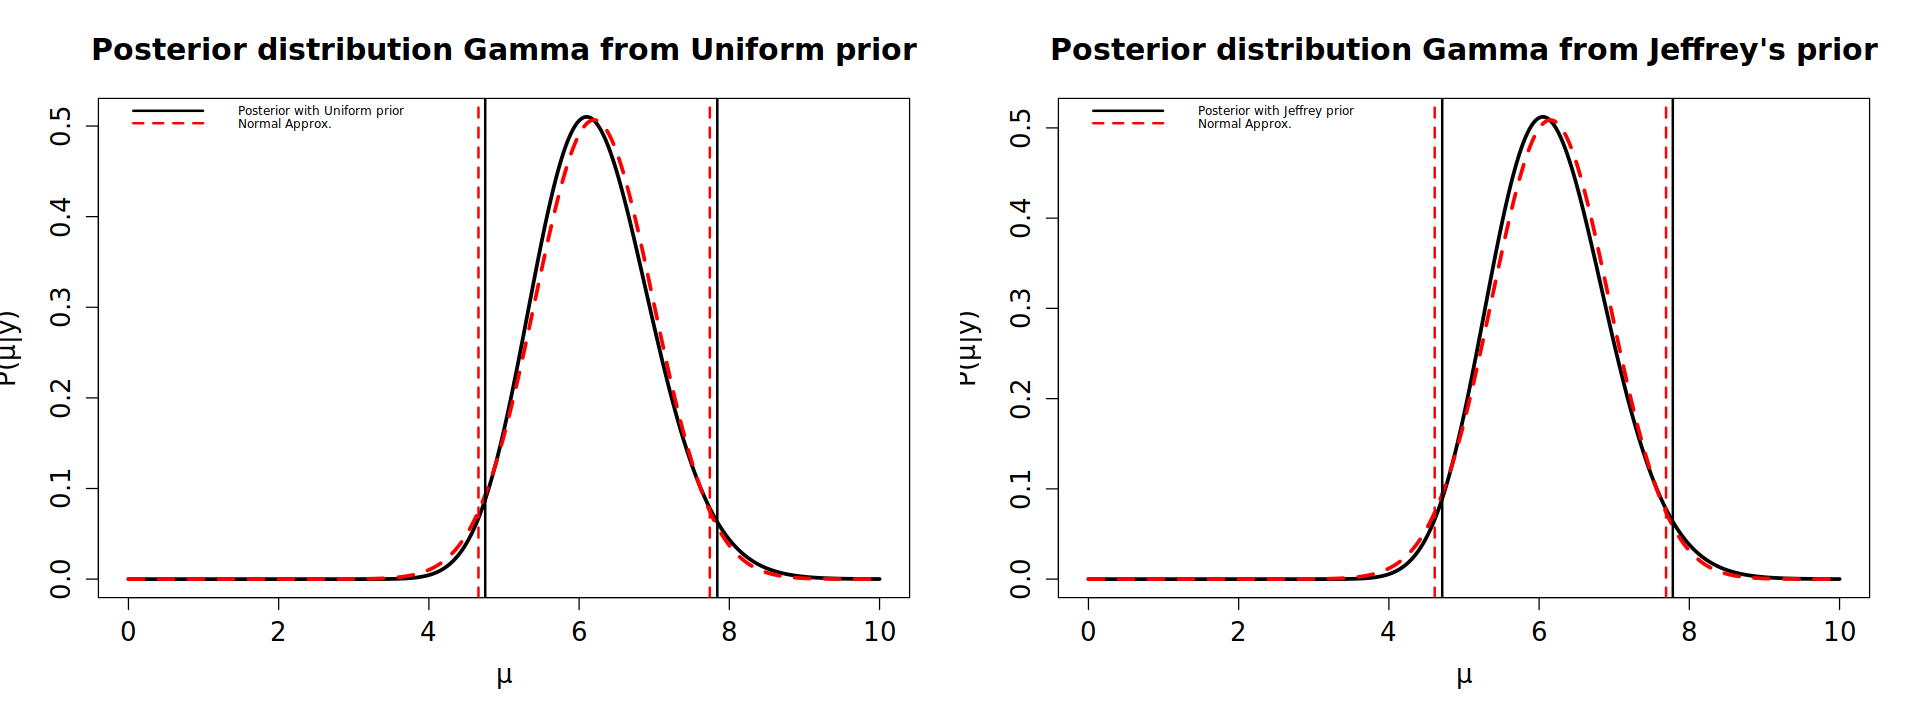

In [7]:
par(mfrow=c(1,2)) 
options(repr.plot.width=16, repr.plot.height=6)

#uniform prior 
plot(mu,post_unif_norm(mu),main="Posterior distribution Gamma from Uniform prior",xlab=expression(paste(mu)),
    ylab=expression(paste("P(",mu,"|y)")), cex.lab=1.3,cex.axis=1.3,cex.main=1.5,type='l',lwd=3)
lines(mu,normalized_approx_unif(mu), lty = 2, lwd = 3,col = "red")
abline(v=lower_bound_unif_approx,col = "red",lty=2, lwd=2)
abline(v=upper_bound_unif_approx,col = "red",lty=2, lwd=2)
abline(v=lower_bound_unif,col = "black",lwd=2)
abline(v=upper_bound_unif,col = "black",lwd=2)
legend("topleft", legend=c("Posterior with Uniform prior","Normal Approx."),
       col=c("black","red"), lty = c(1, 2),lwd=c(2,2),cex=0.6,bty='n')

#jeffrey's prior 
plot(mu,post_jeff_norm(mu),main="Posterior distribution Gamma from Jeffrey's prior",xlab=expression(paste(mu)),
    ylab=expression(paste("P(",mu,"|y)")), cex.lab=1.3,cex.axis=1.3,cex.main=1.5,type='l',lwd=3)
lines(mu,normalized_approx_jeff(mu), lty = 2, lwd = 3,col = "red")
abline(v=lower_bound_jeff_approx,col = "red",lty=2, lwd=2)
abline(v=upper_bound_jeff_approx,col = "red",lty=2, lwd=2)
abline(v=lower_bound_jeff,col = "black",lwd=2)
abline(v=upper_bound_jeff,col = "black",lwd=2)
legend("topleft", legend=c("Posterior with Jeffrey prior","Normal Approx."),
       col=c("black","red"), lty = c(1, 2),lwd=c(2,2),cex=0.6,bty='n')


2. A well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.


- What is the probability distribution of y? The number of times the new method fails to detect the disease ?

Probability distribution of y is a binomial distribution. 
The number of times of the new method fails will be %probability x 75


- On the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method ?

In [8]:
y <- 6 
n <- 75
freq_est <- y/n
freq_est

[1] 0.08

- Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

In [9]:
mean <- 0.15
variance <- (0.14)^2  
alpha <- (((1-mean)/variance)-(1/mean))*mean^2
beta <- alpha*(1/mean-1)

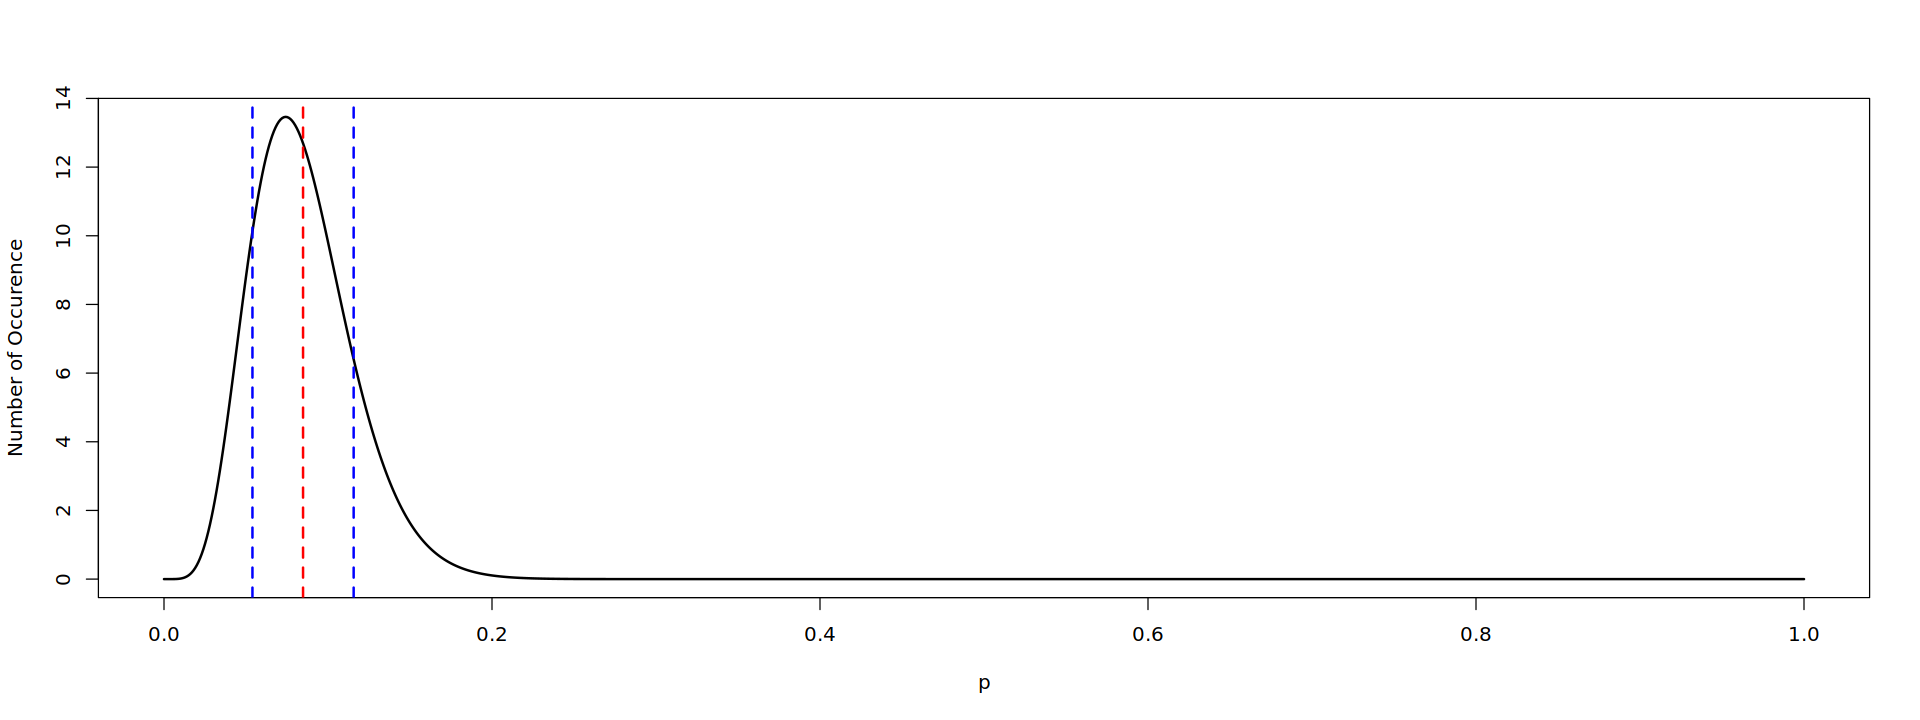

In [10]:
# Define the likelihood function
delta <- 0.001
p <- seq(0, 1, delta)
n <- 75
y <- 6
alpha_post <- alpha + y
beta_post <- beta + (n - y)
post <- function(p) dbeta(p, alpha_post, beta_post)
norm_const <- integrate(post, 0, 1)$value
post_norm <- function(p) post(p)/norm_const
p.mean.post <- delta * sum(p * post_norm(p))

# Define the variance function
variance <- integrate(function(p) (p - p.mean.post)^2 * post_norm(p), 0, 1)$value
standard_deviation <- sqrt(variance)


# Create the plot
plot(p, post_norm(p), xlab = "p", ylab = "Number of Occurence", lwd = 2, type = 'l')
abline(v = p.mean.post, col = "red", lty = 2, lwd = 2)
abline(v = p.mean.post+standard_deviation, col = "blue", lty = 2, lwd = 2)
abline(v = p.mean.post-standard_deviation, col = "blue", lty = 2, lwd = 2)


- Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in
ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test
the sample at a 5% level of significance in the Bayesian way.


In [11]:
#compute the posterior probability of the null hypothesis
p_h <- integrate(function(p) post_norm (p), 0.15, 1)$value
cat("Posterior probability of H0:", p_h, "\n")

#hypothesis test, 5% level of significance
if (p_h < 0.05) {
  cat("Null hypothesis is rejected. The new test is better.\n")
} else {
  cat("Null hypothesis is accepted. The new test is not an improvement.\n")
}


Posterior probability of H0: 0.03127933 
Null hypothesis is rejected. The new test is better.


- Perform the same hypothesis test in the classical frequentist way

In [12]:
# Set the parameters
n <- 75  # total number of patients
y <- 6   # number of failures
p0 <- 0.15  # benchmark failure rate

# Compute the p-value for a one-sided test
p_value <- pbinom(y, size = n, prob = p0, lower.tail = TRUE)

cat(paste("The p-value is", p_value))

The p-value is 0.0543533033542315

In [13]:
binom.test(6,75,0.015,'less',0.95)


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.9999
alternative hypothesis: true probability of success is less than 0.015
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


3. Given the problem of the lighthouse discussed last week, study the case in which both the position
along the shore (α) and the distance out at sea (β) are unknown
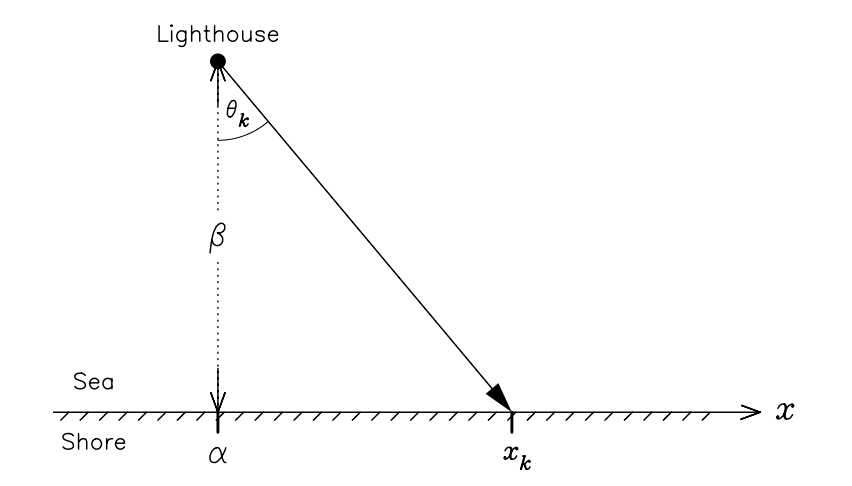

Enter data set dimension: 1
Alpha max:  4.98 


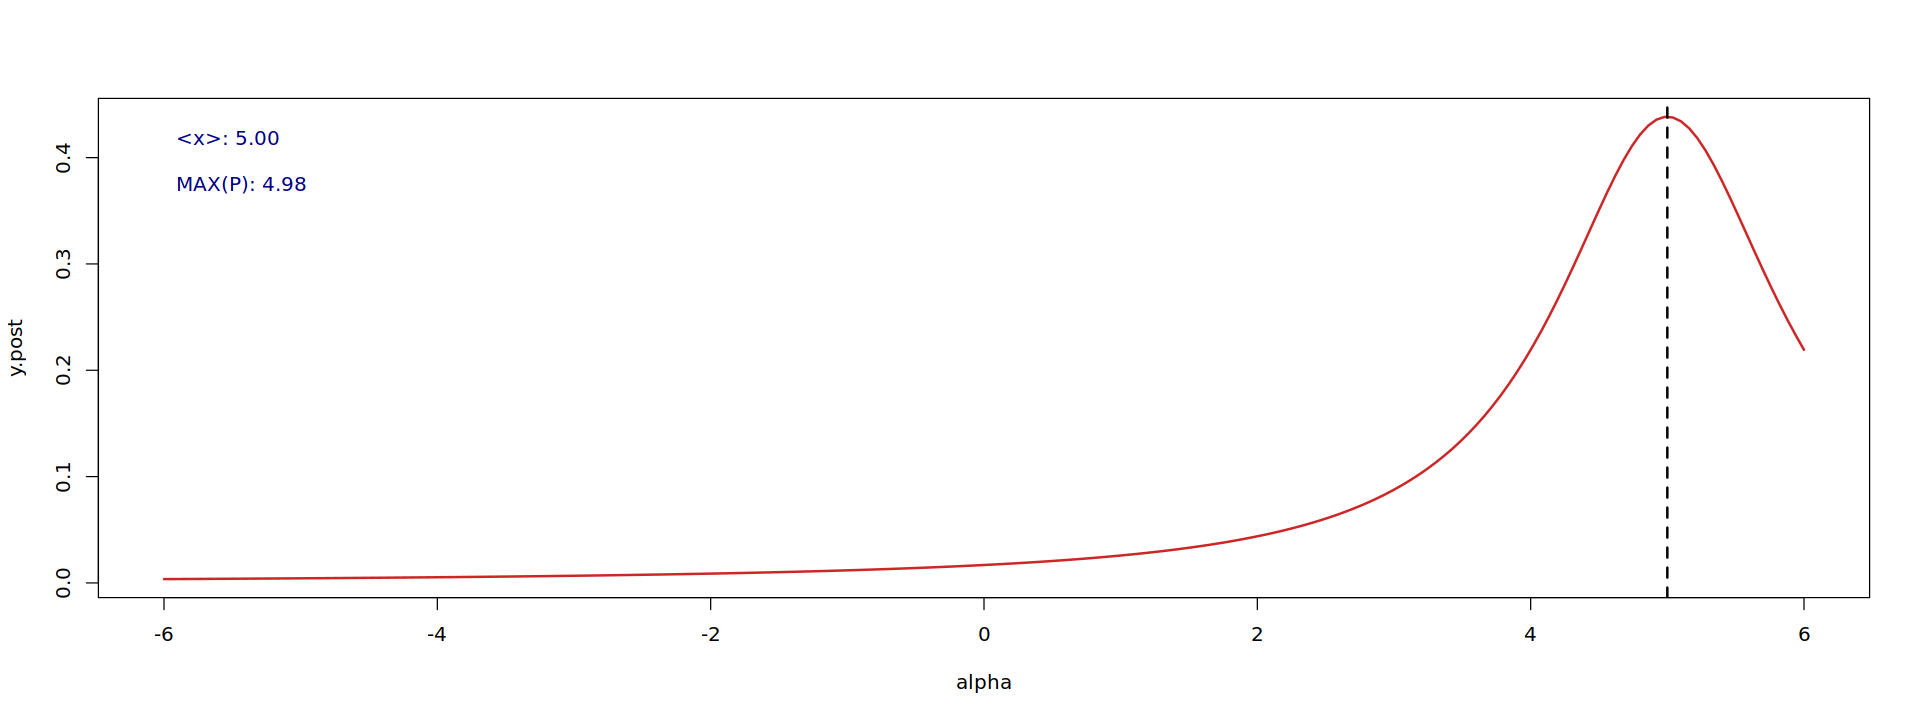

In [16]:
p.log.like <- function(a, data) {
        b <- 1
        logL <- 0.0
        for (x in data) {
            logL <- logL - log(1 + ((x-a)/b)^2)
}
        return(logL)
}
n.sample <- 200
x.min <- -6; x.max <- +6
h <- (x.max - x.min)/n.sample
alpha <- seq(from=x.min, by=h, length.out=n.sample+1)

n.str <- readline("Enter data set dimension: ") 
n.plot <- as.numeric(unlist(strsplit(n.str , ",")))
dt <- data[1:n.plot]

# Get the LogLikelihood
y.log.star <- p.log.like(alpha , dt)

# - Find the maximum
index.max <- which.max(y.log.star)
alpha.max <- alpha[index.max]
cat(paste("Alpha max: ", alpha.max, '\n'))
# - get the exponential and normalize the posterior
y.post.star <- exp(y.log.star)
y.post <- y.post.star /(h*sum(y.post.star ))
plot(alpha , y.post , type='l', lwd=2, col='firebrick3')
dt.mean <- mean(dt)
abline(v=dt.mean , lty=2, lwd=2)
y.band <- (max(y.post) - min(y.post ))*0.05
text(-6, max(y.post )+y.band , col='navy', lwd = 2, pos=4,paste("Data size: ", n.plot , sep=''))
text(-6, max(y.post)-y.band , col='navy', lwd = 2, pos=4,sprintf("<x>: %.2f", dt.mean))
text(-6, max(y.post)-3*y.band , col='navy', lwd = 2, pos=4,sprintf("MAX(P): %.2f", alpha.max))

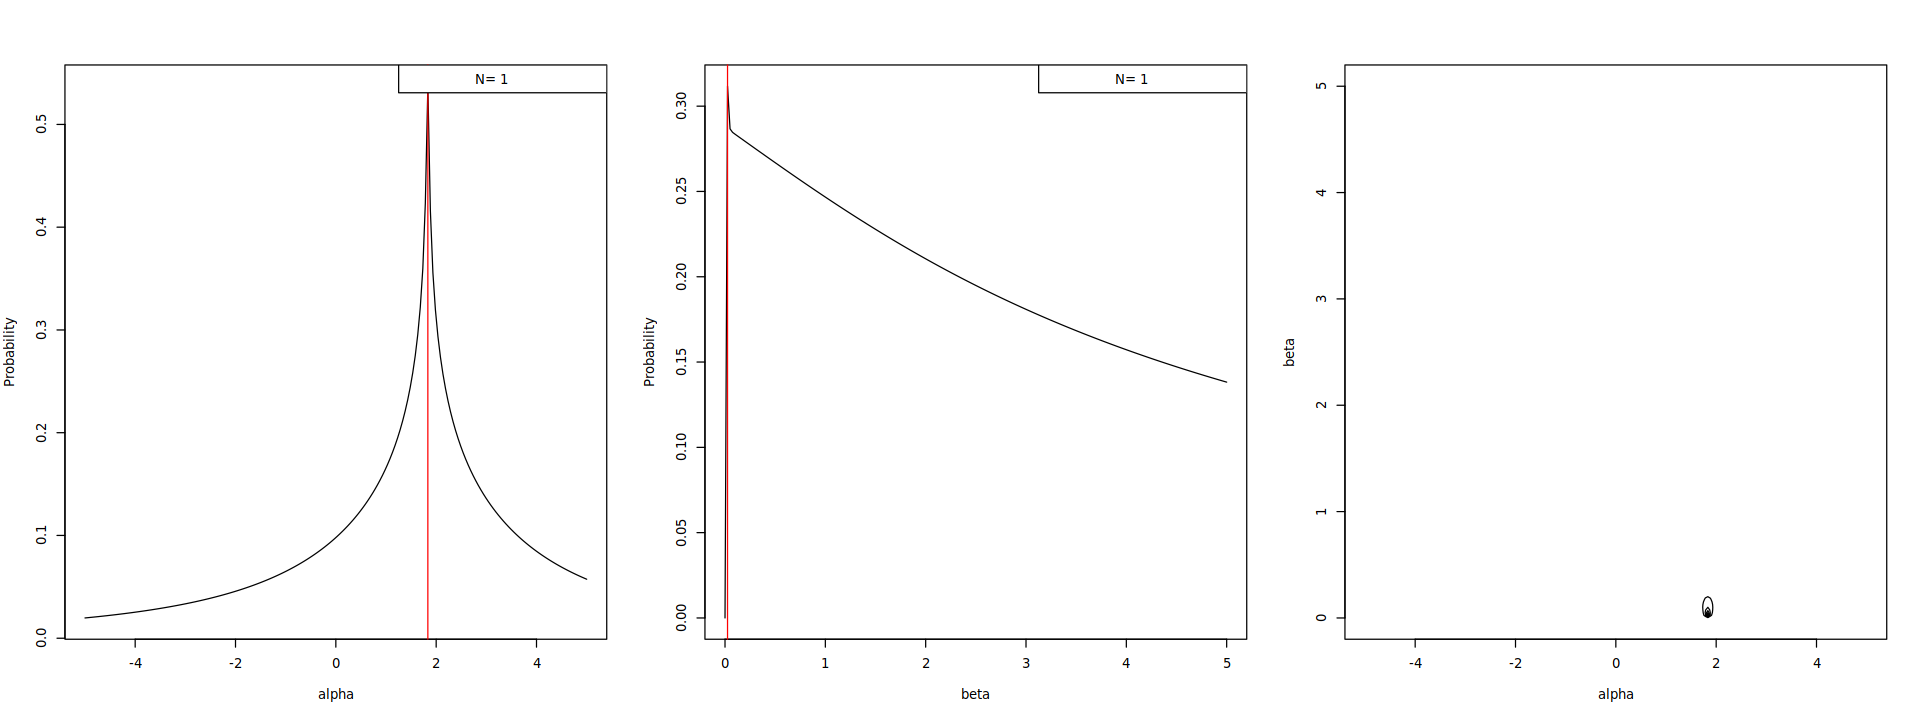

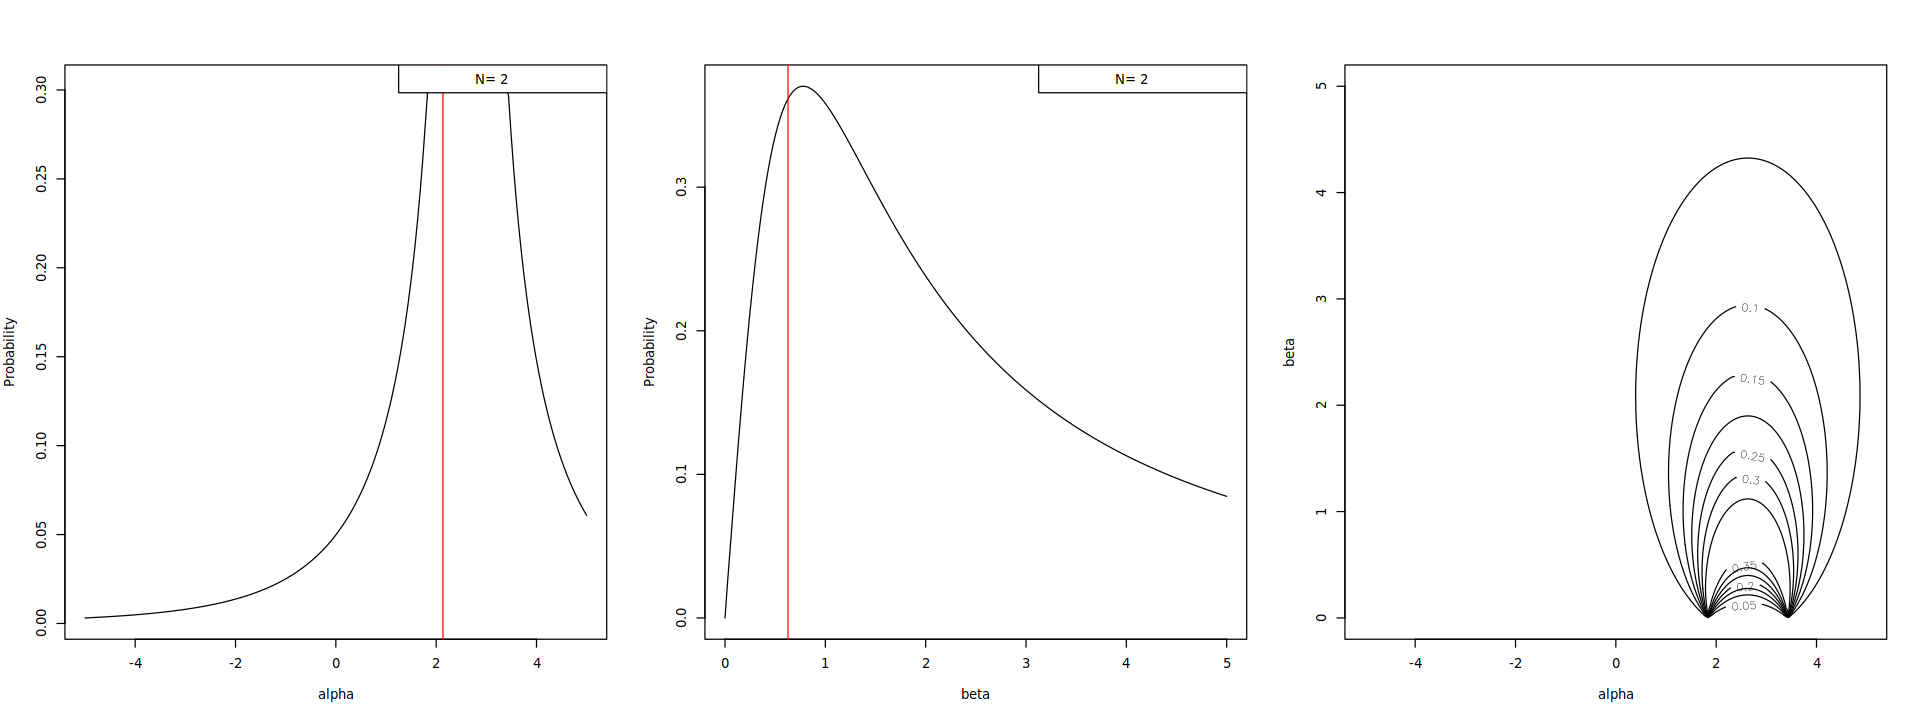

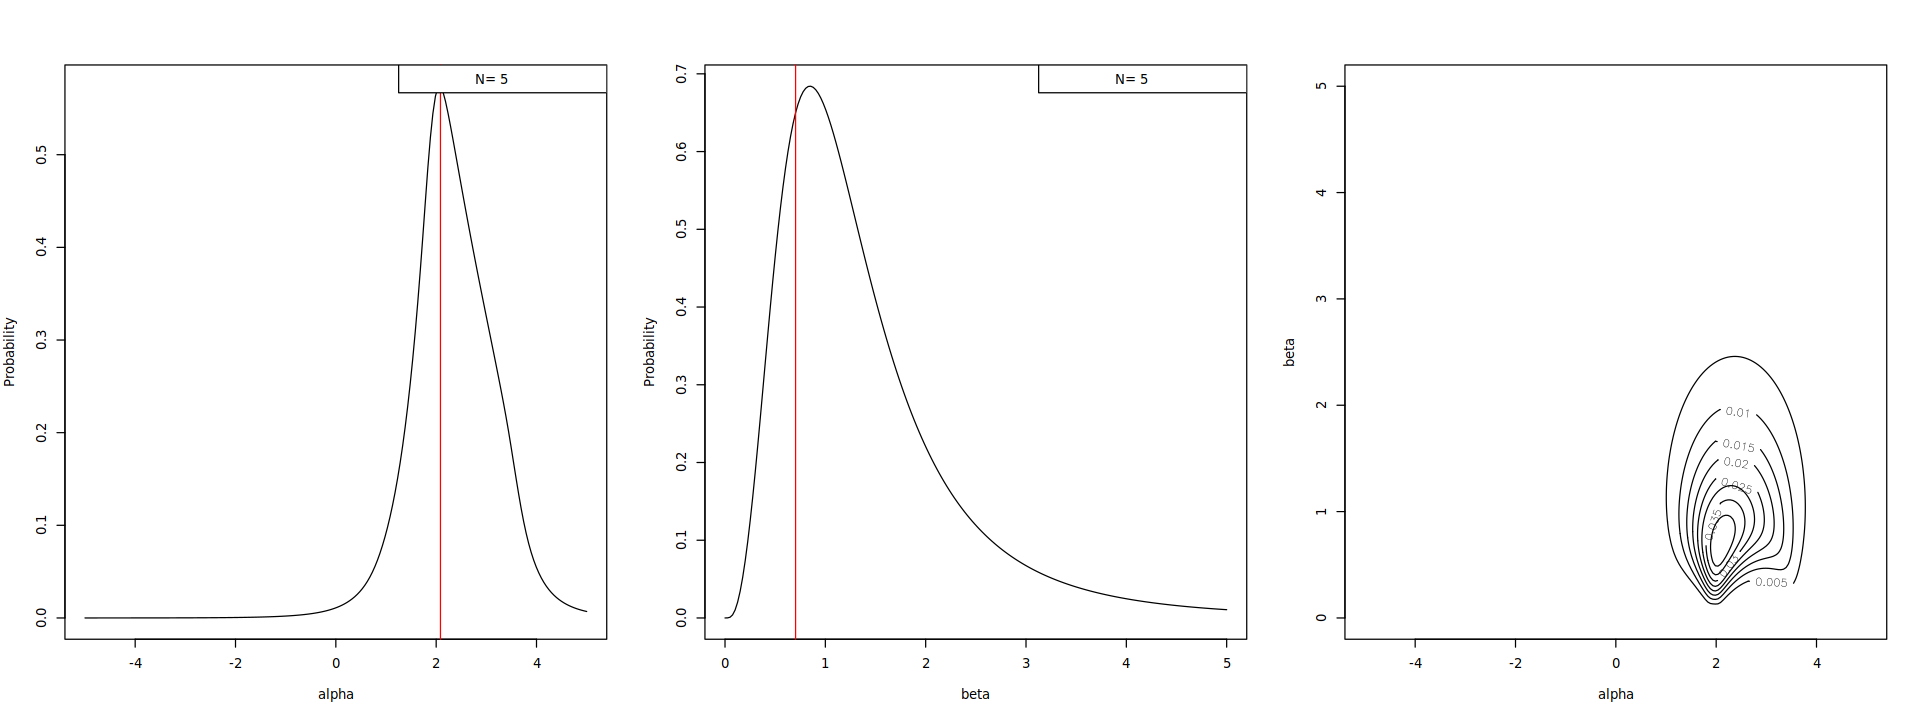

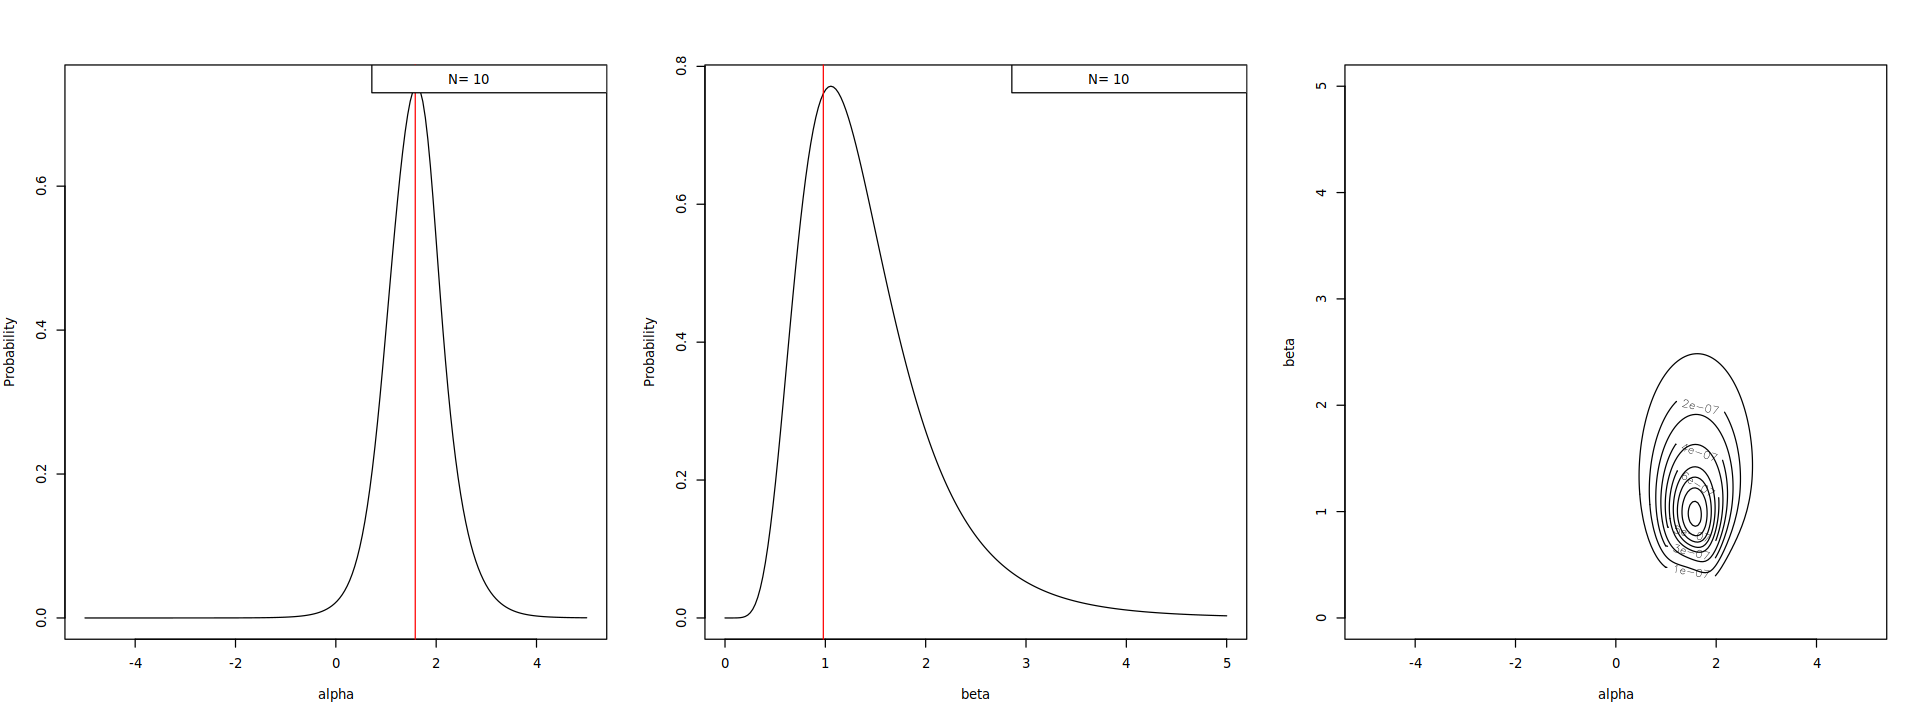

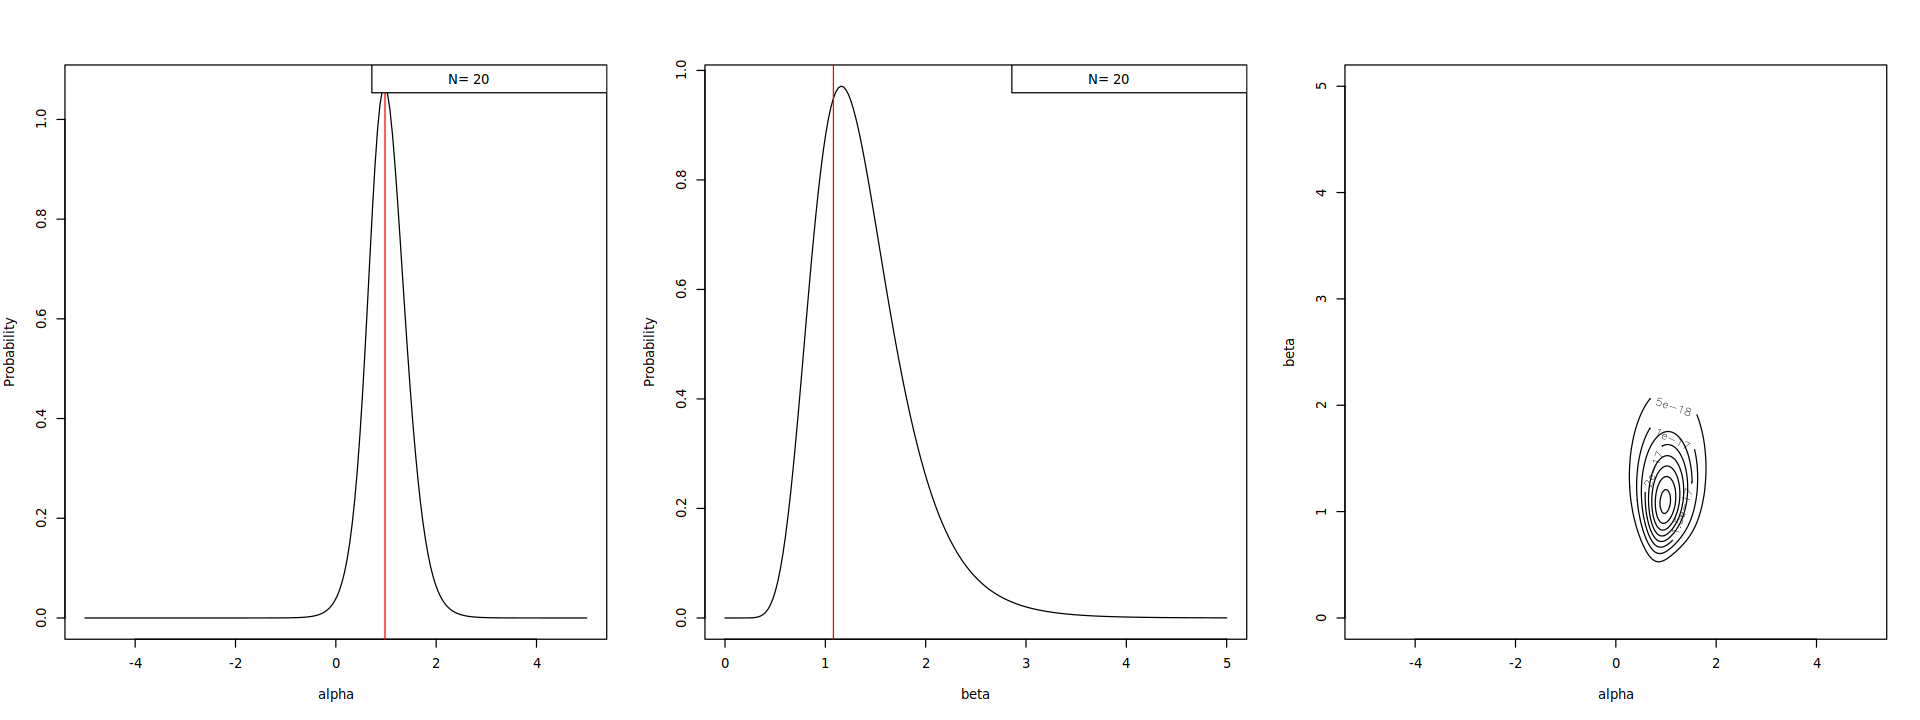

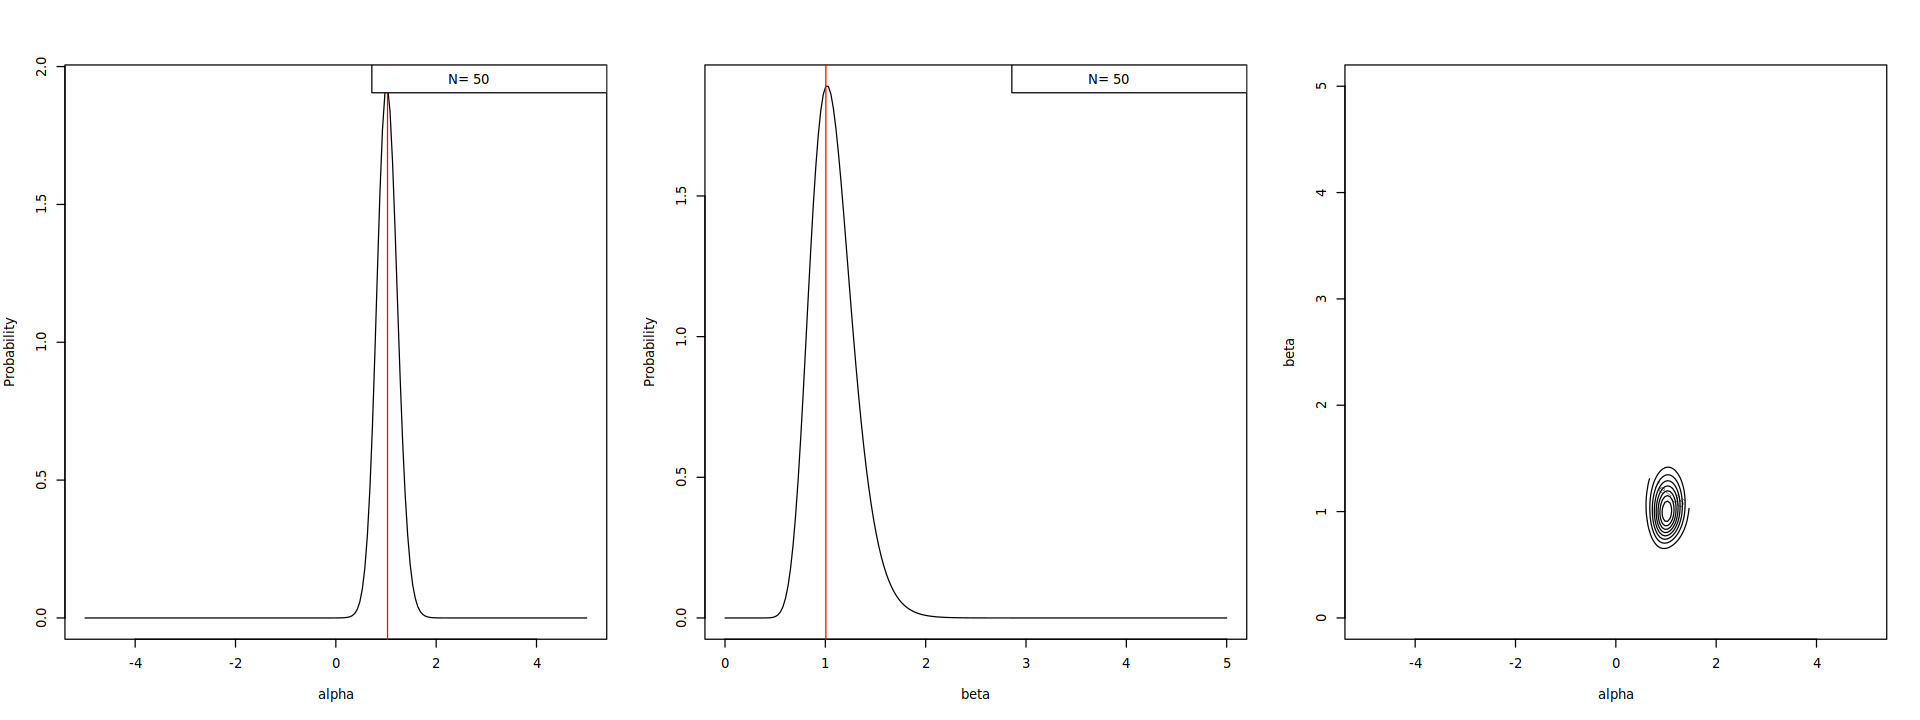

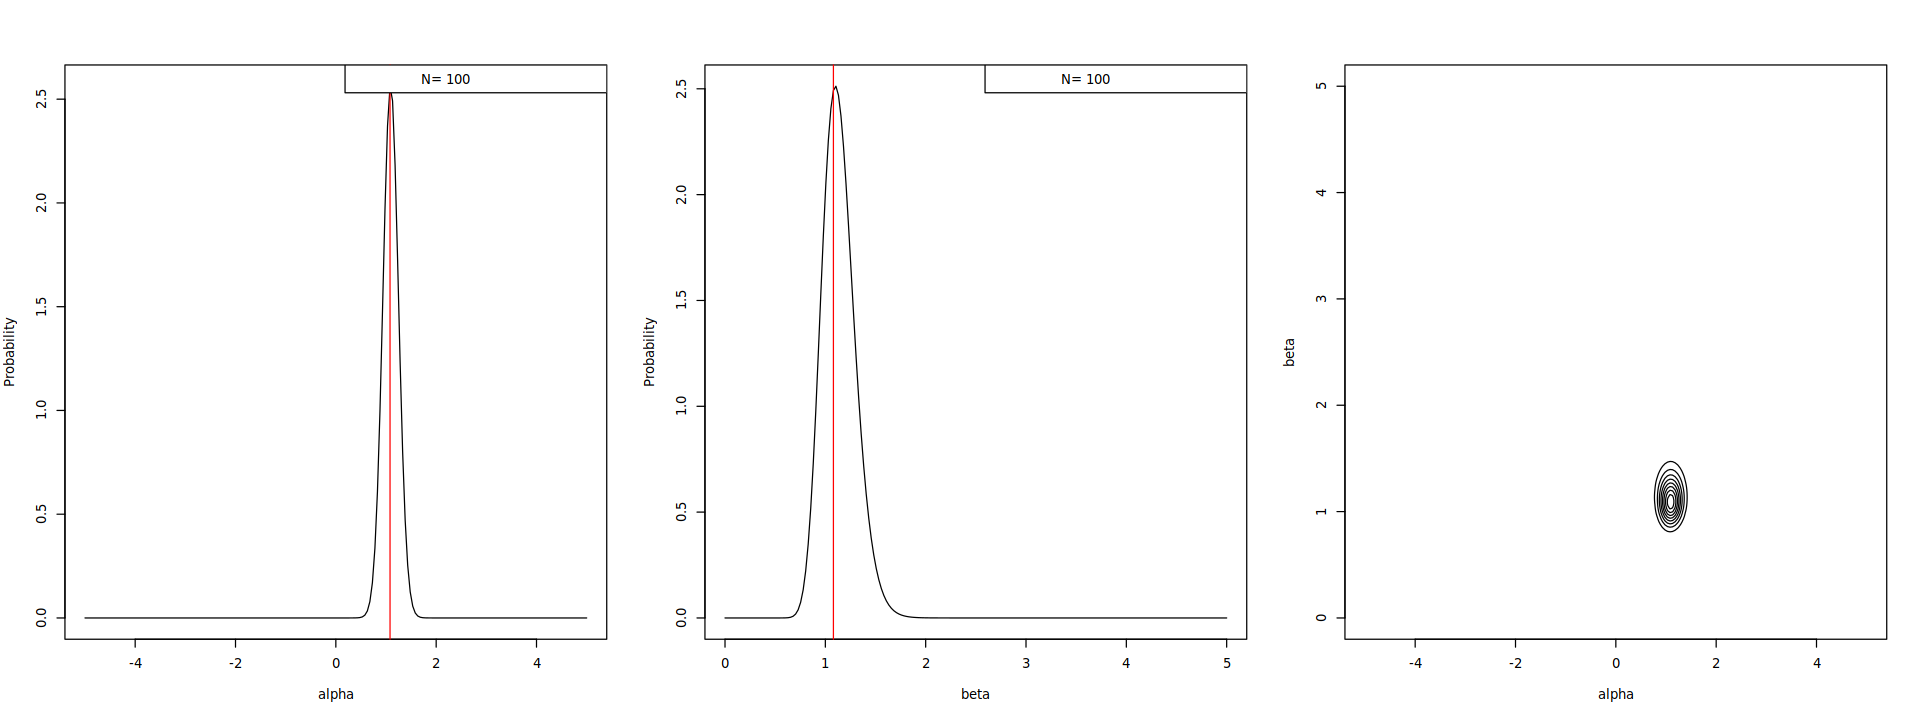

In [17]:
set.seed(12345)

#log-likelihood function
p.log.like <- function(a,b,data){
    logL <- 0.0
    for (x in data){
        logL <- logL + log(b/(b^2+(x-a)^2))
    }
    return(logL)
}

# Generate data of x 
data <- tan(runif(1000,-pi/2,pi/2))+1
collected_data <- c(1,2,5,10,20,50,100)
n_sample <- 200
x_min <- -5
x_max <- 5
y_max <- 5
h <- (x_max - x_min)/n_sample
alpha <- seq(x_min, x_max, length.out = n_sample)
beta <- seq(0, y_max, length.out = n_sample)

#loop over every collected data with every possible alpha and beta 
for (n in collected_data){
    dx <- data[1:n]
    
    #initialize array to store loglikelihood 
    log_array <- matrix(data=NA,length(alpha),length(beta))
    
    #loop for every possible alpha and beta
    for (i in 1:length(alpha)){
        for (j in 1:length(beta)){
            log_array[i,j] = p.log.like(alpha[i], beta[j], dx)
        }
    }
    alpha_max <- alpha[which(log_array == max(log_array), arr.ind = TRUE)[1]]
    beta_max <- beta[which(log_array == max(log_array), arr.ind = TRUE)[2]]
    
    #retrieve the exponent of the log values
    exp_alpha <- apply(exp(log_array), 1, sum)
    exp_alpha  <- exp_alpha /(h*sum(exp_alpha))

    exp_beta <- apply(exp(log_array), 2, sum)
    exp_beta <- exp_beta/((y_max/n_sample)*sum(exp_beta))
    
    #plotting marginalised posterior distributions
    par(mfrow=c(1,3))
    options(repr.plot.width=16, repr.plot.height=6)
    plot(alpha, exp_alpha, xlab='alpha',ylab='Probability',type='l')
    abline(v=alpha_max, col = "red")
    legend("topright",legend =paste('N=',n))
    plot(beta, exp_beta, xlab='beta',ylab='Probability',type='l')
    abline(v=beta_max, col = "red")
    legend('topright',legend =paste('N=',n))
    contour(alpha,beta,exp(log_array), xlab='alpha',ylab='beta')
    
}


4. Given the Signal over Background example discussed last week, analyze and discuss the following
cases:
- Vary the sampling resolution of used to generate the data, keeping the same sampling range
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    - Change the resolution w = {0.1, 0.25, 1, 2, 3}
    - Check the effect on the results

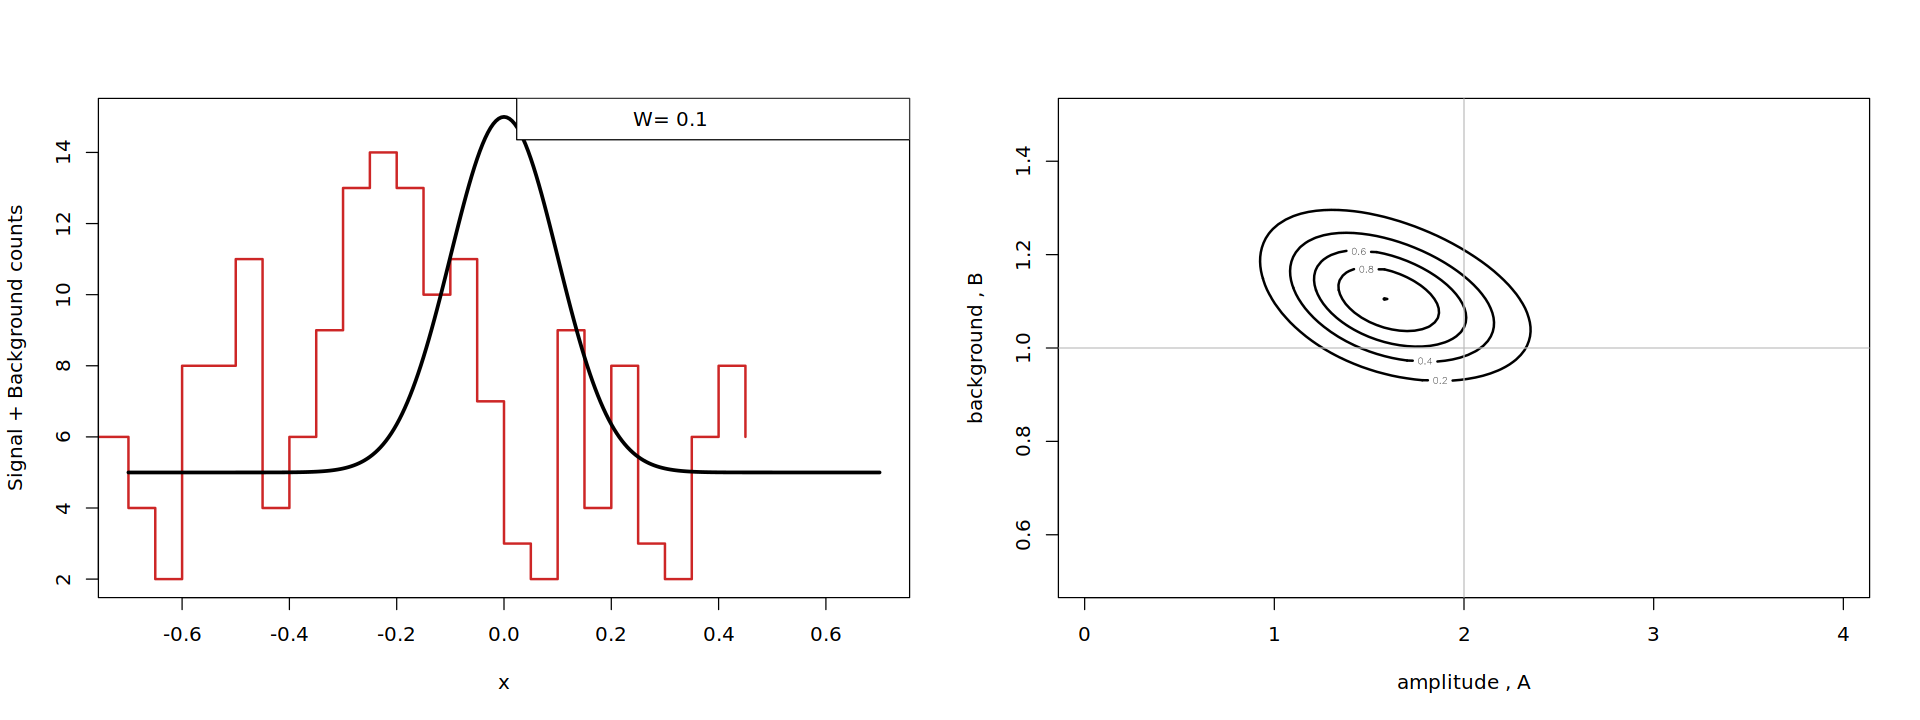

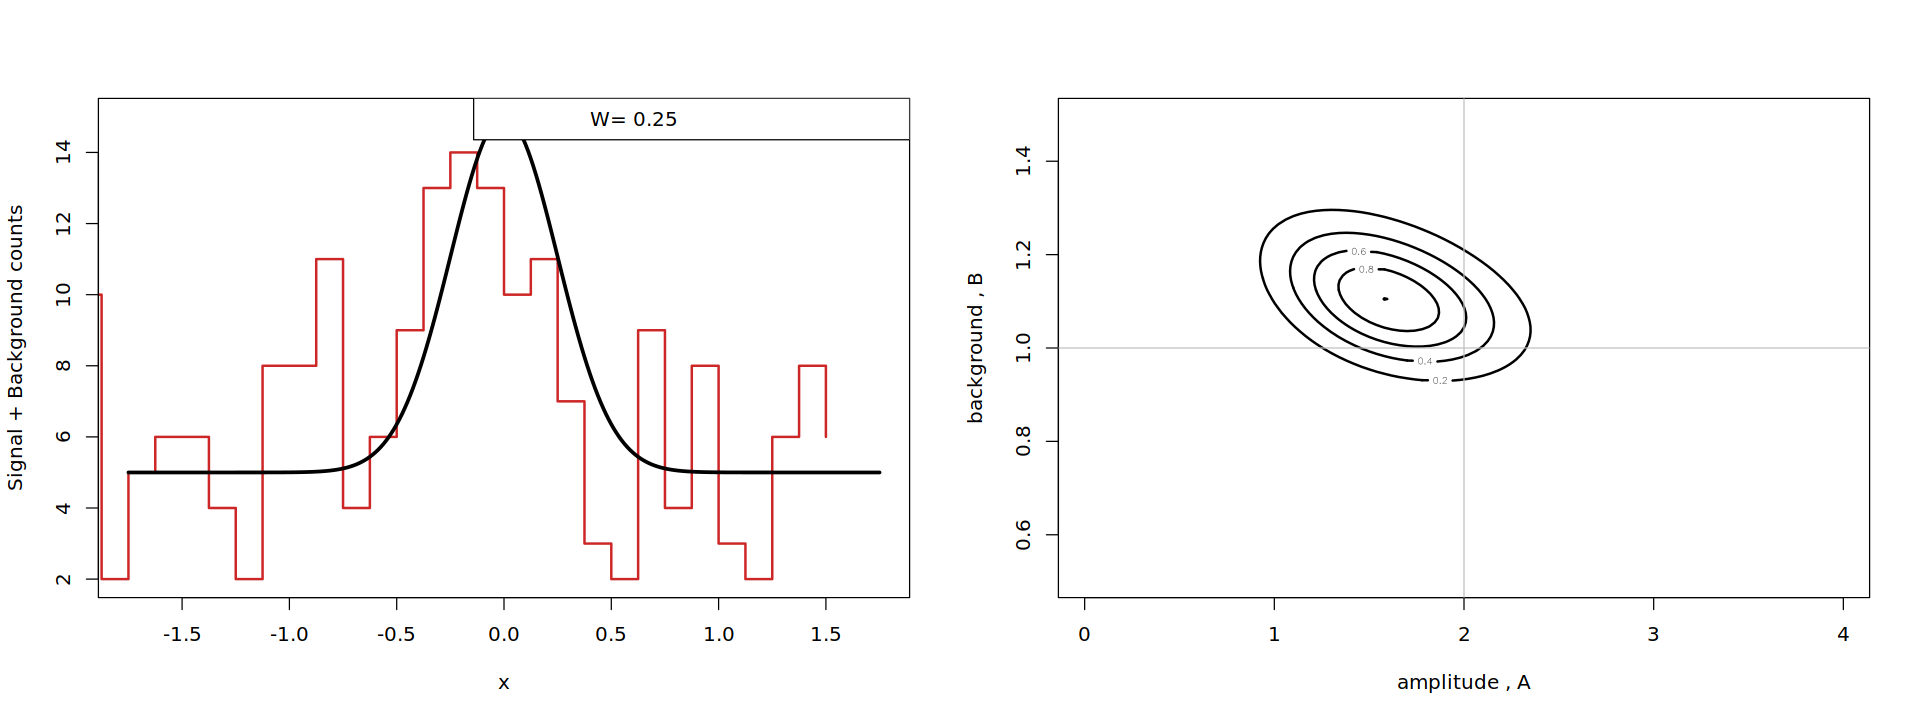

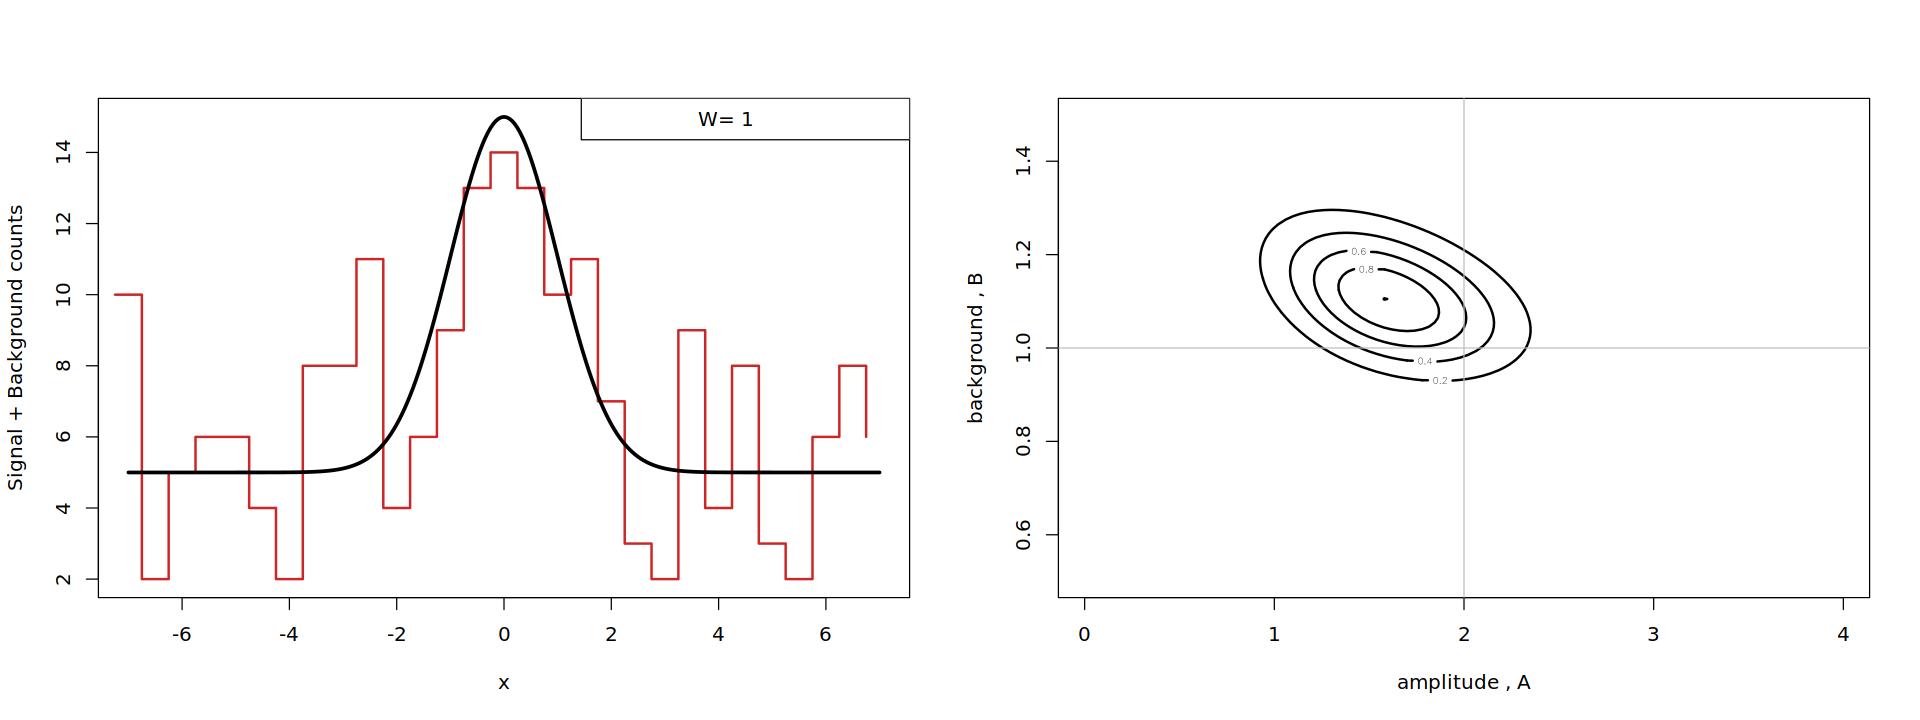

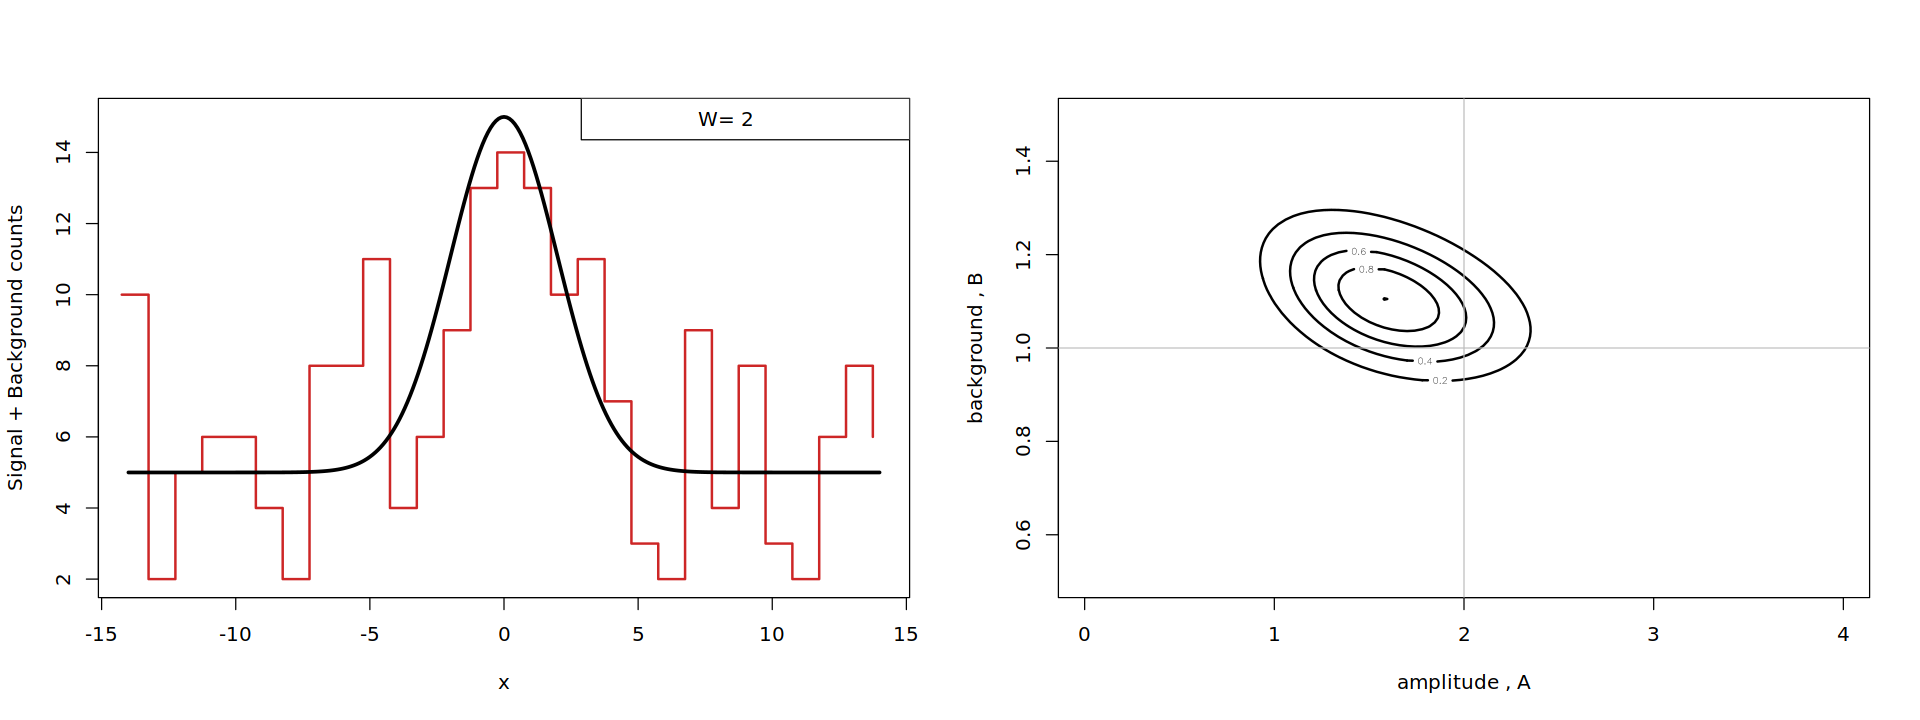

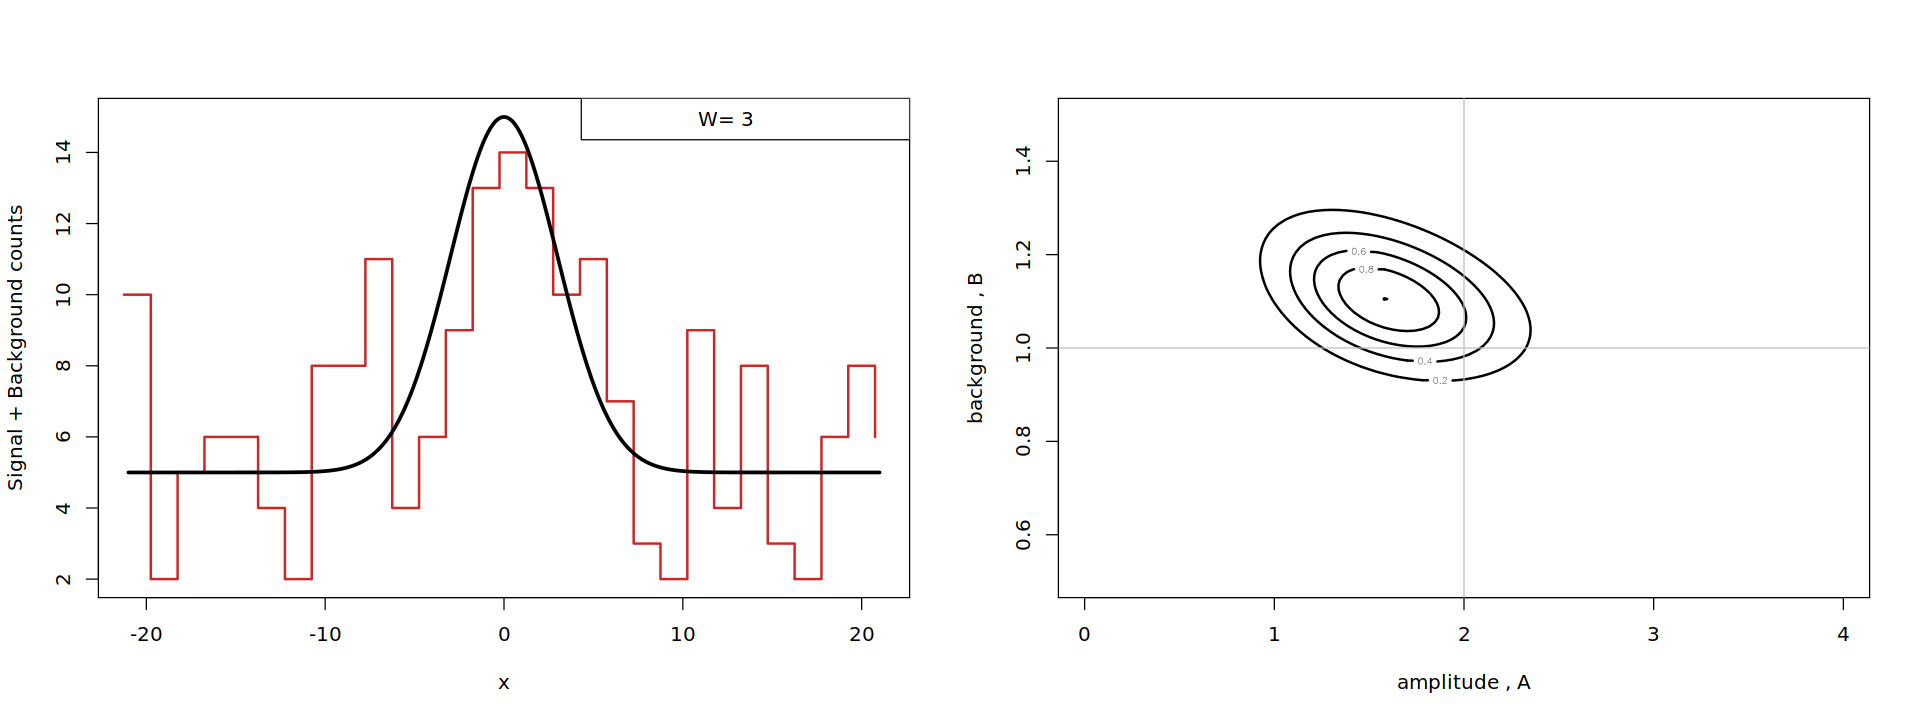

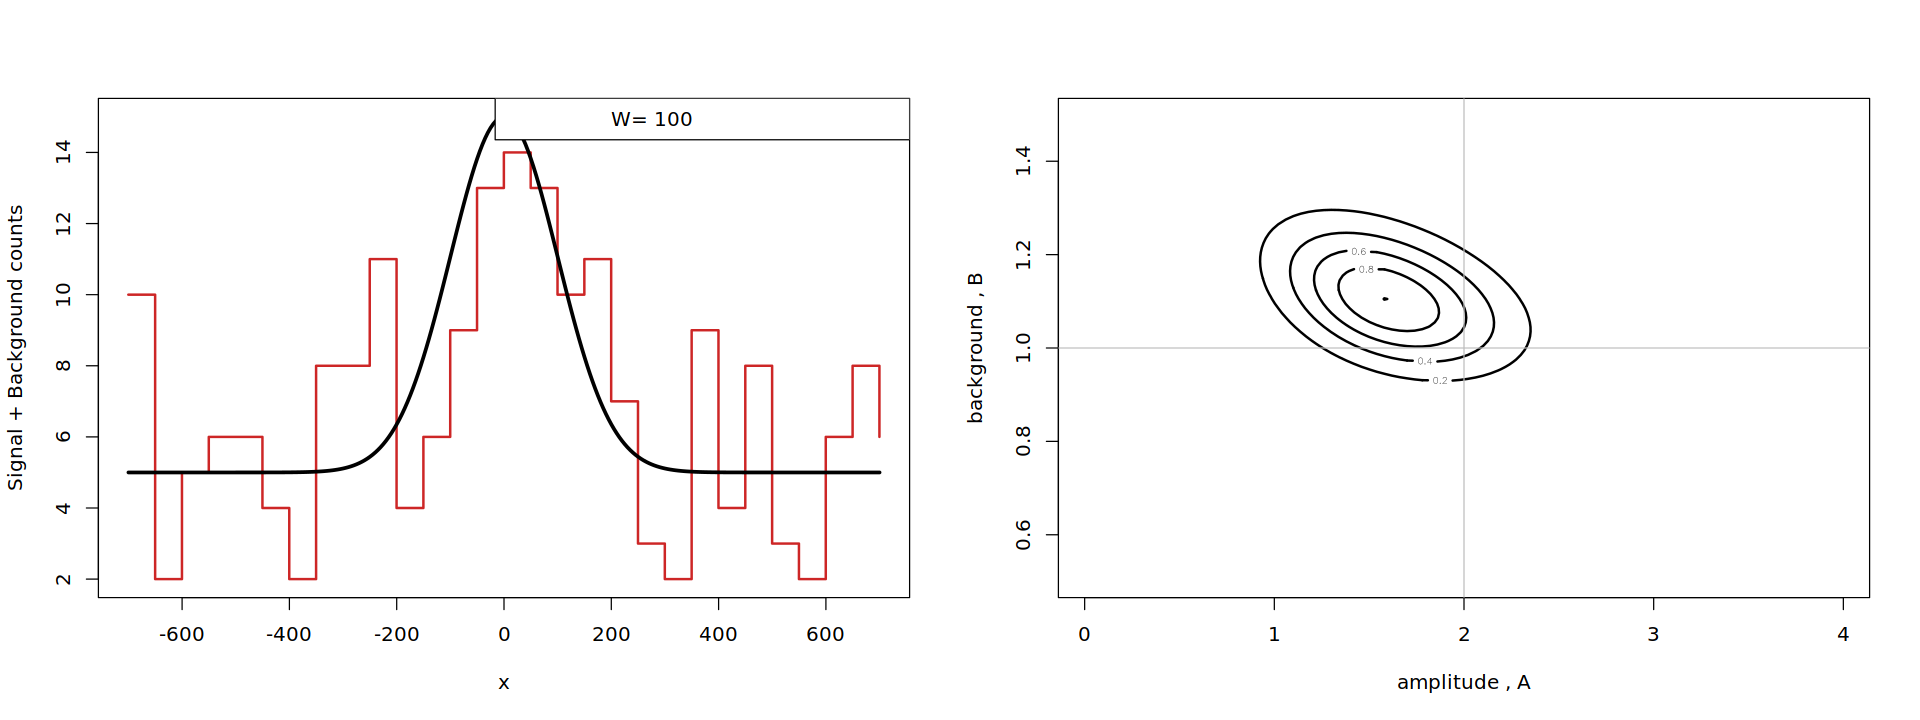

In [18]:
w_res <- c(0.1, 0.25, 1, 2, 3,100)
for (w in w_res){   
    # - Generative model
    signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
    }
    # Define model parameters
    x0 <- 0 # Signal peak
    A.true <- 2 # Signal amplitude
    B.true <- 1 # Background amplitude
    Delta.t <- 5 # Exposure time


    par(mfrow=c(1,2))
    options(repr.plot.width=16, repr.plot.height=6)

    # - Generate the observed data
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois( length (s.true), s.true)

    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w, Delta.t)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat ,xlab='x',ylab="Signal + Background counts",type='s',
         col='firebrick3',lwd=2,xlim=range ( xplot), ylim= range (c(splot , ddat )))
    lines(xplot , splot , type='l',lwd=3)
    legend("topright",legend =paste('W=',w))


    # Log posterior
    log.post <- function(d, x, a, b, x0, w, t) {
        if(a<0 || b <0) {return(-Inf )} # the effect of the prior
        sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
    }

    # - Sampling grid for computing posterior
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
    to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
    }
    }
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z),
        nlevels = 5,
        labcex = 0.5,
        lwd = 2,
        xlab="amplitude , A",
        ylab="background , B")
    abline(v=2,h=1,col="grey")
}

- Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
    - Check the effect on the results

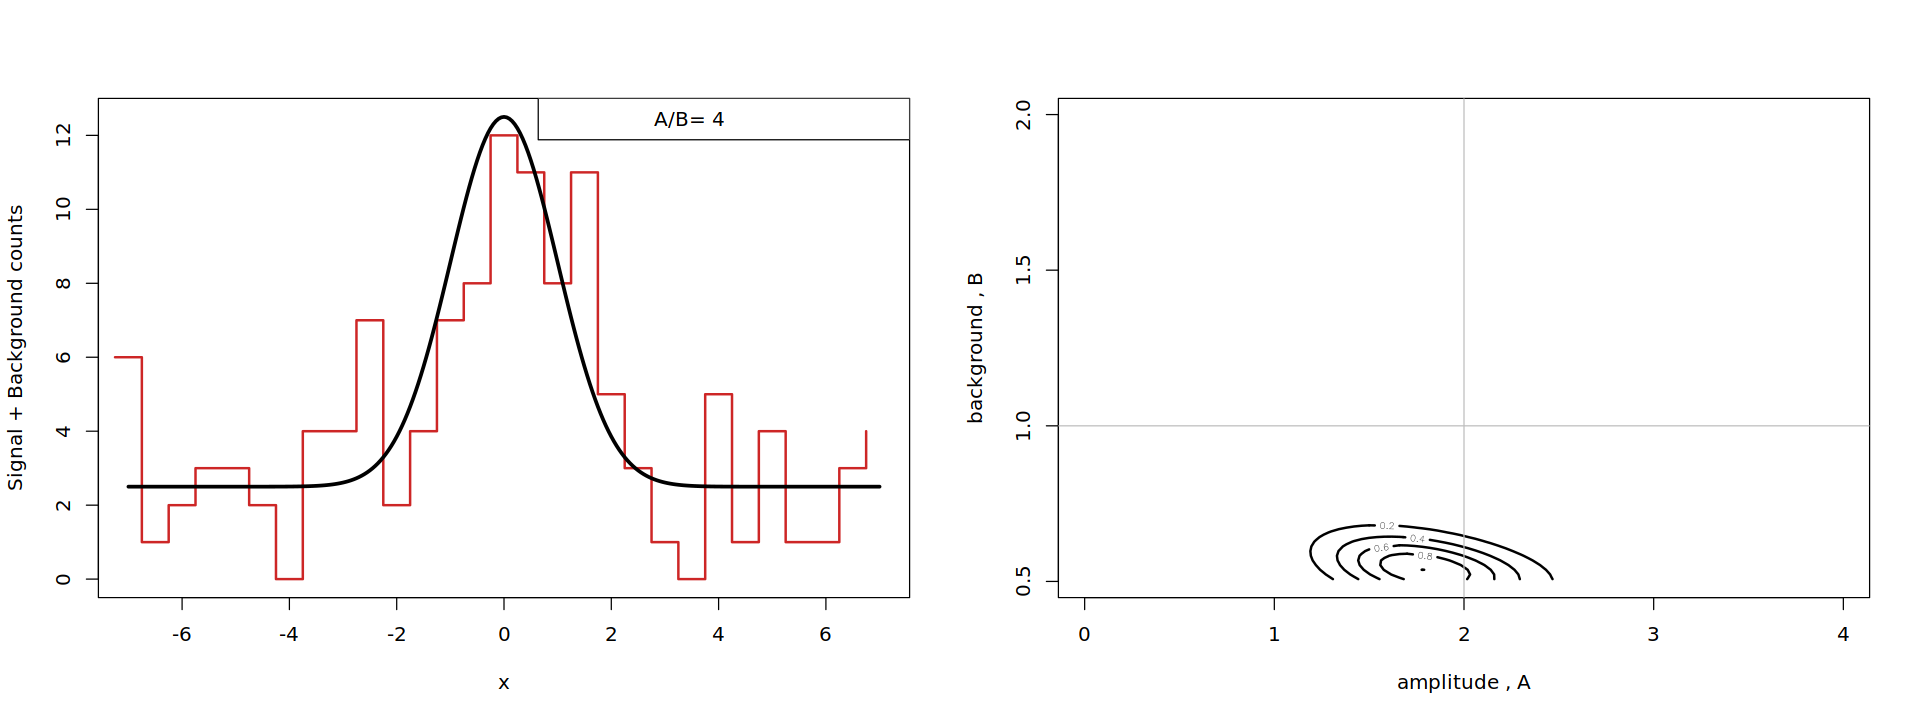

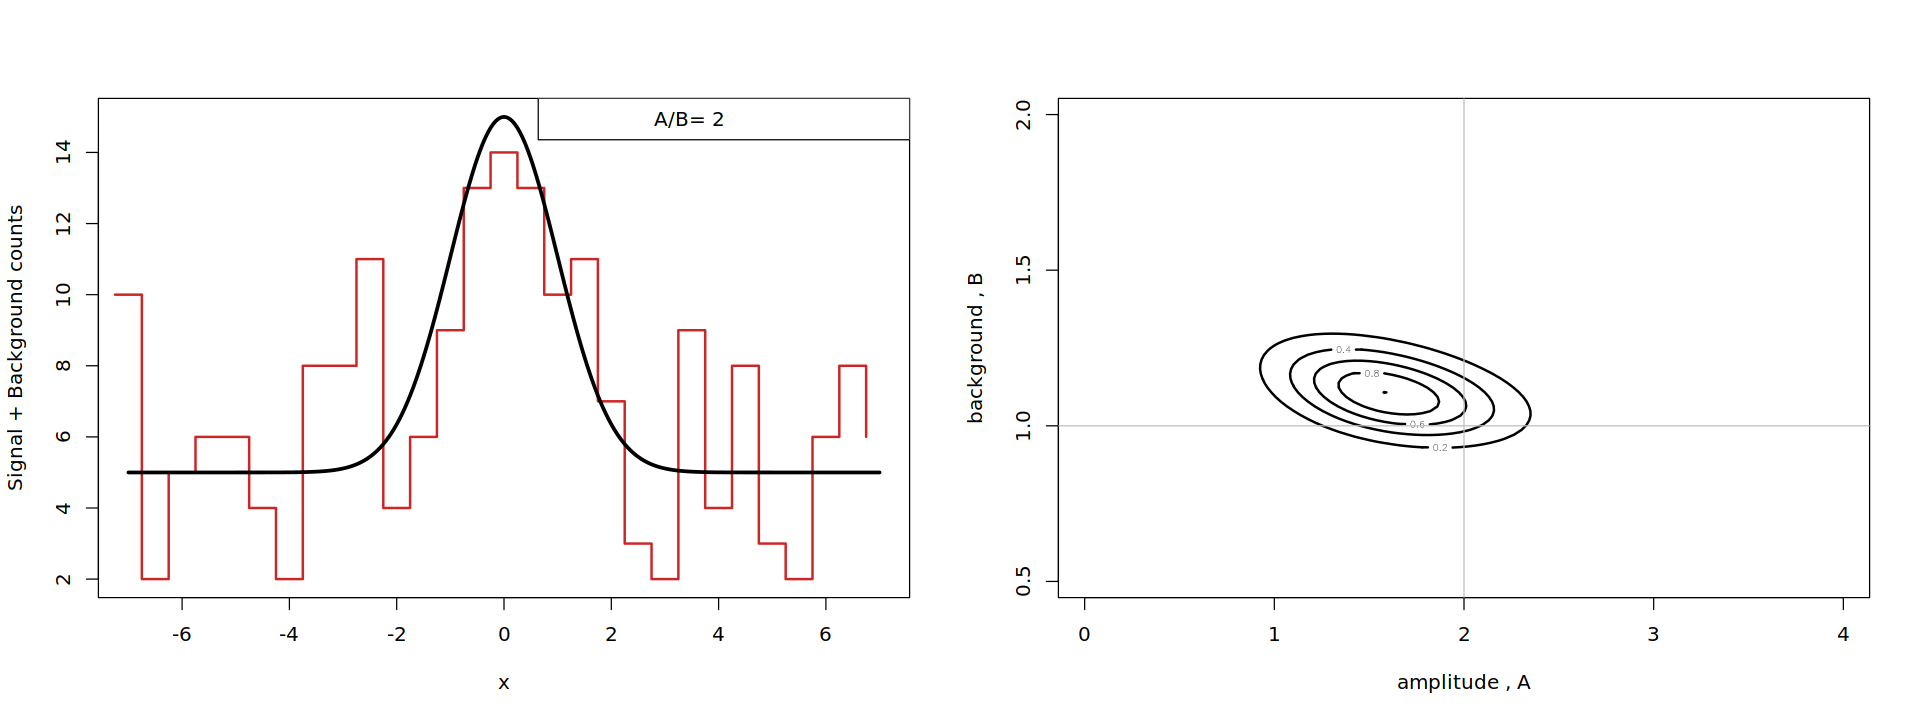

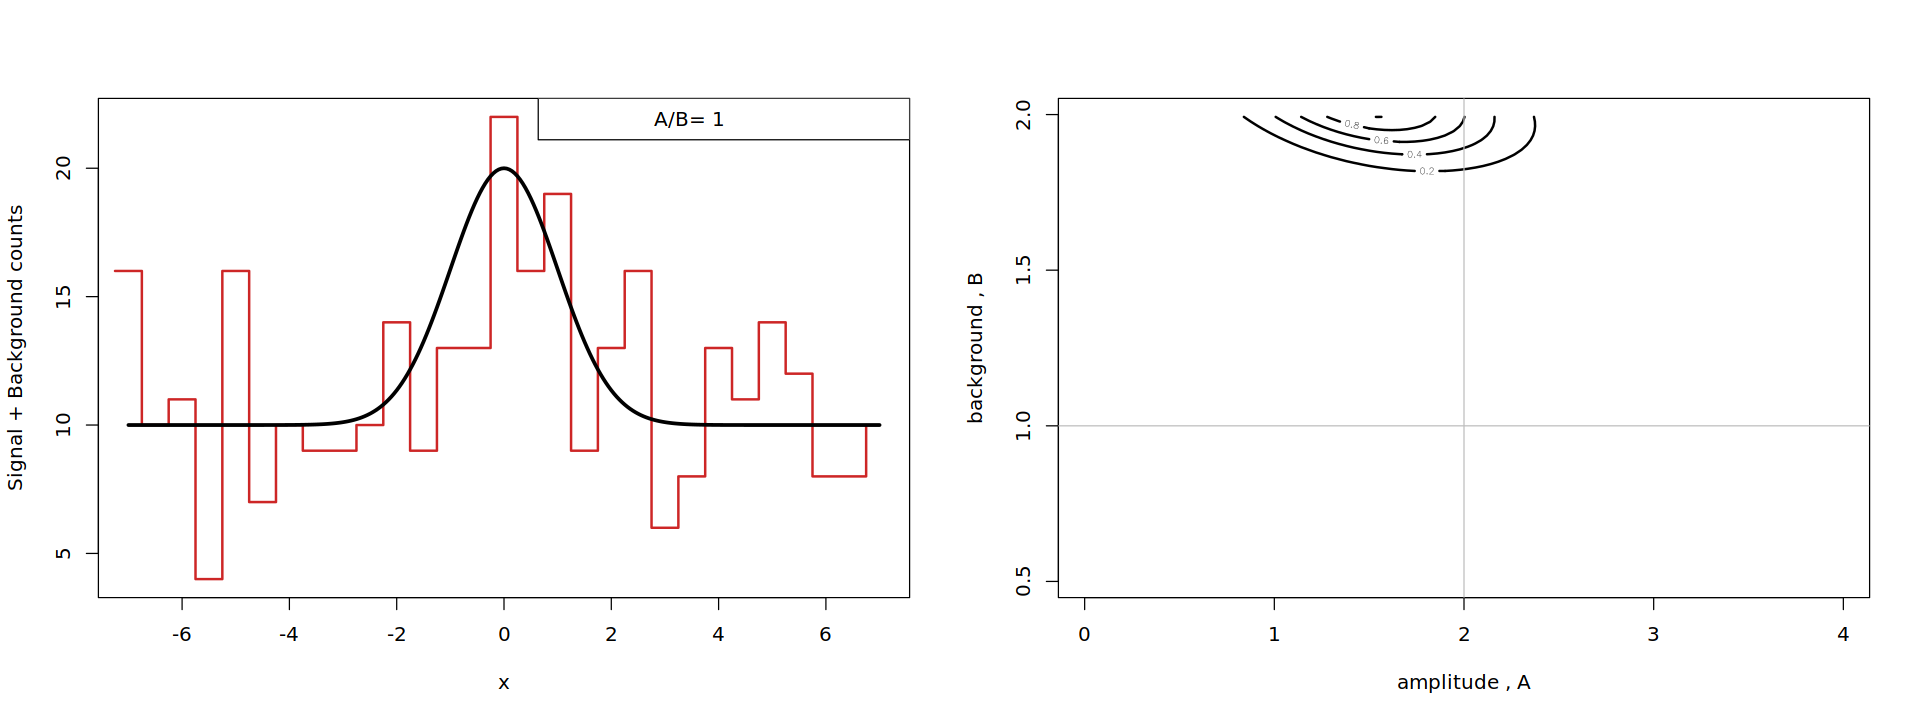

In [19]:
#variance in B 
B <- c(0.5,1,2)
for (B.true in B){   
    # - Generative model
    signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
    }
    # Define model parameters
    x0 <- 0 # Signal peak
    A.true <- 2 # Signal amplitude
    Delta.t <- 5 # Exposure time
    w <-1 # Signal width


    par(mfrow=c(1,2))
    options(repr.plot.width=16, repr.plot.height=6)

    # - Generate the observed data
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois( length (s.true), s.true)

    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w, Delta.t)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat ,xlab='x',ylab="Signal + Background counts",type='s',
         col='firebrick3',lwd=2,xlim=range ( xplot), ylim= range (c(splot , ddat )))
    lines(xplot , splot , type='l',lwd=3)
    legend("topright",legend =paste('A/B=',A.true/B.true))


    # Log posterior
    log.post <- function(d, x, a, b, x0, w, t) {
        if(a<0 || b <0) {return(-Inf )} # the effect of the prior
        sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
    }

    # - Sampling grid for computing posterior
    alim <- c(0.0, 4.0)
    blim <-  c(0.5, 2)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
    to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
    }
    }
    z <- z - max(z) # set maximum to zero

    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z),
        nlevels = 5,
        labcex = 0.5,
        lwd = 2,
        xlab="amplitude , A",
        ylab="background , B")
    abline(v=2,h=1,col="grey")
}